# ЕМ algorithm for detective

#### Some detective story

Famed investigator Nick Carter got into trouble when solving the case of the mysterious disappearance of lady Thuns's dog. During her trip to London a stranger kidnapped her favorite. Even the huge insurance could not comfort hergrief...  The only clue Nick was able to obtain was a set of photographs of the likely villain.  Unfortunately, the villain isnearly indecipherable in the photographs because he used a directed electromagnetic noise on the surveillance camera. Nevertheless it is the only evidence. The main suspects are the members of the Bayesian methods research group from Russia. Nick is just a detective, so he needs your help to recover the image of the villain from the corrupted photos. He has watched too many episodes of CSI and thinks it can be done with the help of EM-algorithm.  Can it? 

Nick has to process the photos and recover the villain's face. He knows that in each photo the face is in a random position on the background. The background is the same for all photos. You should help the investigator to find the villain. Remember, the faster you recognise the villain, the easier it would be to capture him. 

## Model description

We have samples $\textbf{X} = \{\textbf{X}_k\}^K_{k=1}$ of very noisy black-white images with size $h \times w$ pixels. Each image contains the same background and a face of villain with uncertain position. Both the background and the face have rectangular form. Sizes of the face and the background are $h \times w$ and $h \times 2w$ accordingly.

Let us use the following notation:
- $\mathbf{X}_k(i, j)$ — pixel of k-th image;
- $B \in \mathbb{R}^{h \times 2w}$ — the noisless background image, $B(i, j)$ — pixel of the background;
- $F \in \mathbb{R}^{h \times w}$ — the noiseless face of the villain, $F (i, j)$ — pixel of the face;
- $d_k$ — horizonatal coordinate  of  the  upper-left  corner  of  the  face  on  the k-th  image, $d = (d_1 , \dots , d_K )$ — the vector of coordinates for all $K$ images.

### More formally model looks like

$$
    p(\mathbf{X}_k\mid d_k, \mathbf{\theta})=\prod_{ij}
    \begin{cases} 
    	\mathcal{N}(\mathbf{X}_k(i,j)\mid \mathbf{F}(i, j-d_k), s^2), 
    	& \text{if} (i,j)\in faceArea(d_k)\\
    	\mathcal{N}(\mathbf{X}_k(i,j)\mid \mathbf{B}(i,j),s^2), & \text{otherwise}
    \end{cases},
$$

$$p(d_k) = \frac{1}{w+1}$$

$$p(\mathbf{X}, \mathbf{d}|\boldsymbol{\theta}) = \prod_k p(\mathbf{X}_k|d_k, \boldsymbol{\theta})p(d_k)$$

### Let's derive formulas for:

- Posterior distribution for face position $p(d_k|\mathbf{X}_k, \boldsymbol{\theta})$
- Point estimations for $\boldsymbol{\theta}$
- Log-likelihood lower bound $\mathcal{L}(q, \boldsymbol{\theta})$

### Load data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.misc import logsumexp
%matplotlib inline

In [2]:
images = np.load('images.npy')

In [3]:
print('h = %d' % images.shape[0])
print('2w = %d' % images.shape[1])
print('N = %d' % images.shape[2])

h = 15
2w = 30
N = 800


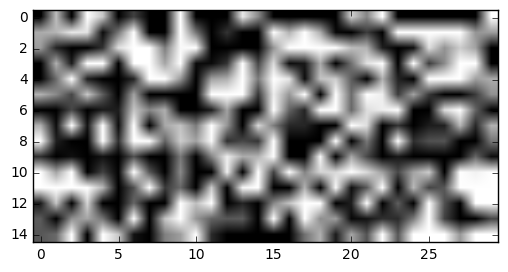

In [4]:
plt.imshow(images[:, :, 1], cmap=plt.cm.gray)

## It's time to realize these functions

#### Function prototypes:

In [ ]:
def get_lpx_d_all(X, F, B, s):
##################################################################
#
# Calculates log(p(X_k|d_k,F,B,s)) for all images X_k in X and 
# all possible displacements d_k.
#
# Input parameters:
#
#   X ... h x 2w x N numpy.array, N images of size H x W
#   F ... h x w numpy.array, estimate of villain's face
#   B ... h x 2w numpy.array, estimate of background
#   s ... 1 x 1, estimate of standart deviation of Gaussian noise
#
# Output parameters:
#   
#   lpx_d_all ... (w + 1) x N numpy.array, 
#                 px_d_all[dw,k] - log-likelihood of 
#                 observing image X_k given that the villain's 
#                 face F is located at displacement dw
#
##################################################################

In [ ]:
def calc_L(X, F, B, s, q, useMAP = False):
###################################################################
#
# Calculates the lower bound L(q,F,B,s) for the marginal log 
# likelihood
#
# Input parameters:
#
#   X ... h x 2w x N numpy.array, N images of size H x W
#   F ... h x w numpy.array, estimate of villain's face
#   B ... h x 2w numpy.array, estimate of background
#   s ... 1 x 1, estimate of standart deviation of Gaussian noise
#   q  ... if useMAP = False:
#             (w + 1) x N numpy.array, 
#             q[dw,k] - estimate of posterior of displacement 
#             dw of villain's face given image Xk
#           if useMAP = True:
#             N numpy.array, 
#             q[k] - MAP estimates of dh for X_k 
#   useMAP ... logical, if true then q is a MAP estimates of 
#              displacement dw of villain's face given image 
#              Xk 
#
# Output parameters:
#   
#   L ... 1 x 1, the lower bound L(q,F,B,s) for the marginal log 
#         likelihood
#
###################################################################

In [ ]:
def e_step(X, F, B, s, useMAP = False):
##################################################################
#
# Given the current esitmate of the parameters, for each image Xk
# esitmates the probability p(d_k|X_k,F,B,s)
#
# Input parameters:
#
#   X ... h x 2w x N numpy.array, N images of size H x W
#   F ... h x w numpy.array, estimate of villain's face
#   B ... h x 2w numpy.array, estimate of background
#   s ... 1 x 1, estimate of standart deviation of Gaussian noise
#   useMAP ... logical, if true then q is a MAP estimates of 
#              displacement dw of villain's face given image 
#              Xk 
#
# Output parameters:
#   
#   q  ... if useMAP = False:
#             (w + 1) x N numpy.array, 
#             q[dw,k] - estimate of posterior of displacement 
#             dw of villain's face given image Xk
#           if useMAP = True:
#             N numpy.array, 
#             q[k] - MAP estimates of dw for X_k 
###################################################################

In [ ]:
def m_step(X, q, useMAP = False):
###################################################################
# 
# Estimates F,B,s,A given esitmate of posteriors defined by q
#
# Input parameters:
#
#   X     ... h x 2w x N numpy.array, N images of size H x W
#   q  ... if useMAP = False:
#             (w + 1) x N numpy.array, 
#             q[dw,k] - estimate of posterior of displacement 
#             dw of villain's face given image Xk
#           if useMAP = True:
#             N numpy.array, 
#             q[k] - MAP estimates of dw for X_k 
#   h ... 1 x 1, face mask hight
#   w ... 1 x 1, face mask widht
#  useMAP ... logical, if true then q is a MAP estimates of 
#             displacement (dh,dw) of villain's face given image 
#             Xk 
#
# Output parameters:
#   
#   F ... h x w numpy.array, estimate of villain's face
#   B ... h x 2w numpy.array, estimate of background
#   s ... 1 x 1, estimate of standart deviation of Gaussian noise
###################################################################

In [ ]:
def run_EM(X, h, F=None, B = None, s = None,
    tolerance = 0.001, max_iter = 50, useMAP = False):
###################################################################
# 
# Runs EM loop until the likelihood of observing X given current
# estimate of parameters is idempotent as defined by a fixed 
# tolerance
#
# Input parameters:
#
#   X ... h x 2w x N numpy.array, N images of size H x W
#   F, B, s ... initial parameters (optional!)
#   F ... h x w numpy.array, estimate of villain's face
#   B ... h x 2w numpy.array, estimate of background
#   s ... 1 x 1, estimate of standart deviation of Gaussian noise
#   tolerance ... parameter for stopping criterion
#   max_iter  ... maximum number of iterations
#   useMAP ... logical, if true then after E-step we take only 
#              MAP estimates of displacement (dh,dw) of villain's 
#              face given image Xk 
#    
#
# Output parameters:
#   
#   F, B, s... trained parameters
#   LL ... 1 x (number_of_iters + 2) numpy.array, L(q,F,B,s,A) 
#          at initial guess, after each EM iteration and after 
#          final estimate of posteriors;
#          number_of_iters is actual number of iterations that was 
#          done
###################################################################